# **Convolutional Neural Network (CNN)**

### 🔧 Install Required Libraries

In [1]:
!pip install tensorflow matplotlib

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/376.0 MB 6.7 MB/s eta 0:00:56
   ---------------------------------------- 0.5/376.0 MB 6.2 MB/s eta 0:01:01
   ---------------------------------------- 0.7/376.0 MB 5.7 MB/s eta 0:01:06
   ---------------------------------------- 1.0/376.0 MB 5.6 MB/s eta 0:01:08
   ---------------------------------------- 1.3/376.0 MB 5.8 MB/s eta 0:01:06
   ---------------------------------------- 1.4/376.0 MB 5.6 MB/s eta 0:01:07
   ---------------------------------------- 1.6/376.0 MB 5.4 MB/s eta 0:01:10
   ---------------------------------------- 1.9/376.0 MB 5.6 MB/s eta 0:01:07
   ---------------------------------------- 2.0/376.0 MB 5.5 MB/s eta 0:01:08
   ---------------------------------------- 2.3/376.0 MB 5.5 MB/s eta 0:01:08
   ---------------------------------------- 2.6/376.0 MB 5.5 MB/s eta 0:01:09
   ---------------------------------------- 2.8/376.0 MB 5.3 MB/s eta 0

In [2]:
# TensorFlow & Keras for building the model
import tensorflow as tf
from tensorflow.keras import layers, models

In [3]:
# Matplotlib for plotting
import matplotlib.pyplot as plt

In [4]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


### 📥 Load MNIST and Normalize It

In [7]:
import pandas as pd
import numpy as np

In [8]:
train_df = pd.read_csv("mnist_train.csv")
test_df = pd.read_csv("mnist_test.csv")

### Split Features (X) and Labels (y)

In [9]:
# Split train
y_train = train_df.iloc[:, 0].values
x_train = train_df.iloc[:, 1:].values

# Split test
y_test = test_df.iloc[:, 0].values
x_test = test_df.iloc[:, 1:].values

### Normalize and Reshape the Data

In [10]:
# Normalize pixel values to [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape to (samples, 28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32')
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32')

In [11]:
# Checking the Shape
print("Training set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)

Training set: (60000, 28, 28, 1) (60000,)
Test set: (10000, 28, 28, 1) (10000,)


## 🚀 Build the CNN Model

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

## ⚙️ Compile the Model

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 🧪 Train the Model

In [20]:
history = model.fit(x_train, y_train, epochs=5, 
                    validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.9017 - loss: 0.3219 - val_accuracy: 0.9821 - val_loss: 0.0541
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9840 - loss: 0.0505 - val_accuracy: 0.9818 - val_loss: 0.0581
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9897 - loss: 0.0334 - val_accuracy: 0.9848 - val_loss: 0.0457
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9914 - loss: 0.0259 - val_accuracy: 0.9915 - val_loss: 0.0267
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9945 - loss: 0.0160 - val_accuracy: 0.9898 - val_loss: 0.0309


## 📊 Plot Accuracy and Loss

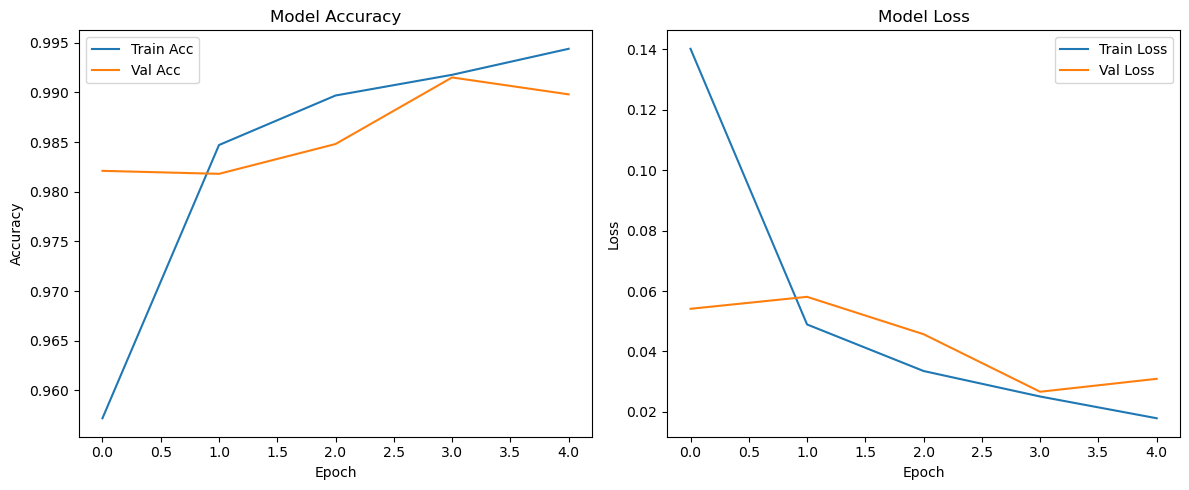

In [21]:
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## 🎯 Evaluate the Model on Test Data

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9862 - loss: 0.0393

✅ Test Accuracy: 0.9898


## ✅ Visualize Predictions on Test Data

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


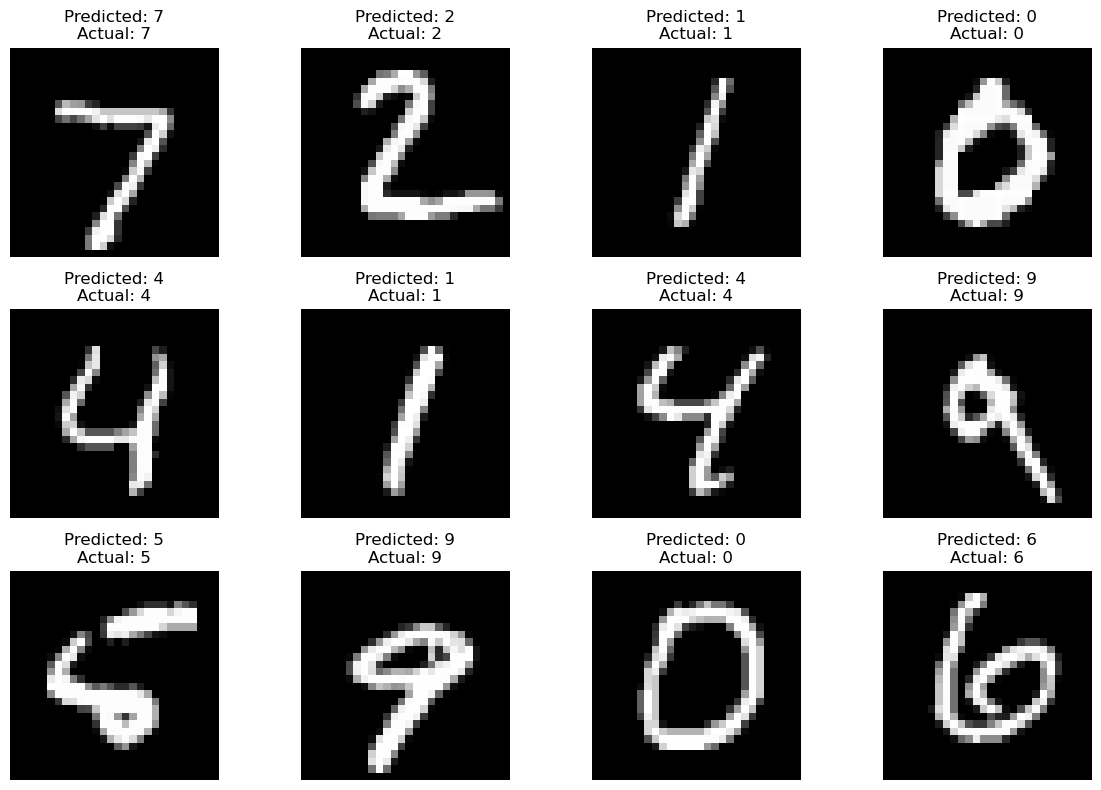

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Predict on test data
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Plot some test images with their predicted and actual labels
plt.figure(figsize=(12, 8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_classes[i]}\nActual: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## ✅ Save the Trained Model

In [26]:
model.save("mnist_cnn_model.keras")
print("Model saved successfully!")

Model saved successfully!


In [27]:
from tensorflow.keras.models import load_model

model = load_model("mnist_cnn_model.keras")
print("Model loaded successfully!")

Model loaded successfully!


## ✅ Confusion Matrix – To Analyze Errors

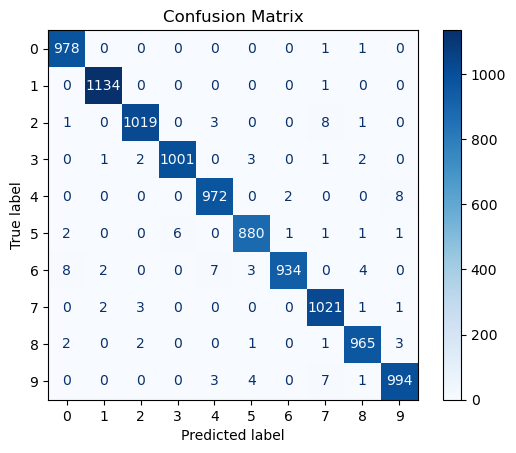

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [29]:
import os
os.makedirs('model', exist_ok=True)
model.save('model/cnn_model.keras')